In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Original Signal

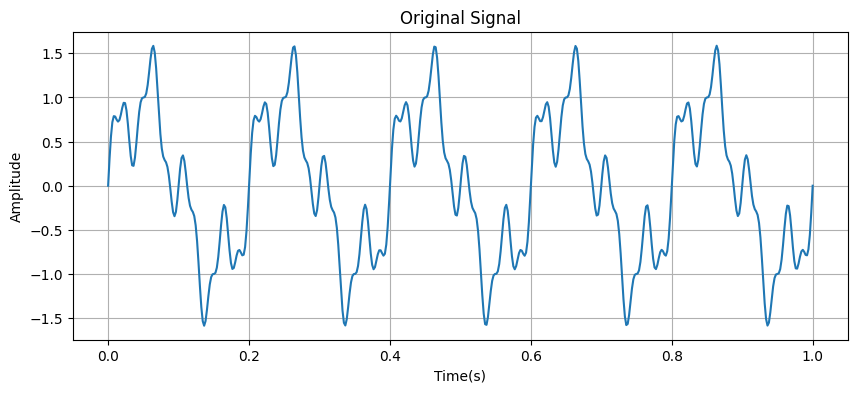

In [25]:
t = np.linspace(0,1,500)  #Start,end,samples

f1 = 5
f2 = 20
f3 = 50

A1 = 1
A2 = 0.5
A3 = 0.2



signal1 = A1*np.sin(2*np.pi*f1*t)
signal2 = A2*np.sin(2*np.pi*f2*t)
signal3 = A3*np.sin(2*np.pi*f3*t)

signal = signal1 + signal2 + signal3

plt.figure(figsize=(10,4))
plt.plot(t,signal)
plt.title("Original Signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Quantization

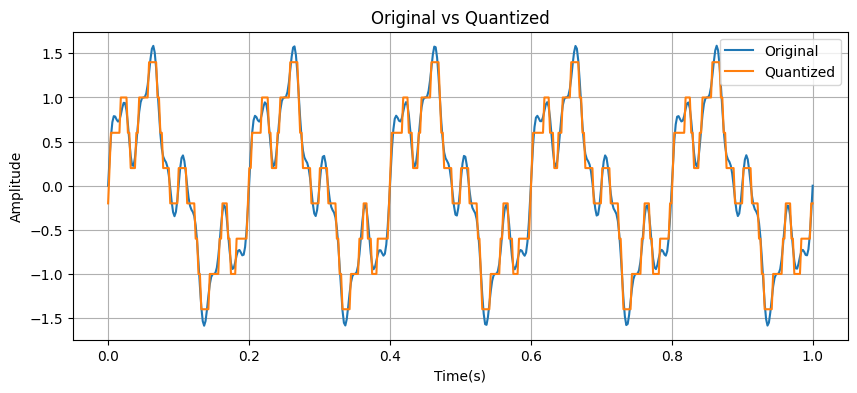

In [26]:
num_niveles = 6
quantized_signal = np.round((signal + 1) * (num_niveles - 1) / 2) * (2 / (num_niveles - 1)) -1

plt.figure(figsize=(10,4))
plt.plot(t, signal, label="Original")
plt.plot(t, quantized_signal, label="Quantized")
plt.title("Original vs Quantized")
plt.legend()
plt.grid(True)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

# FFT

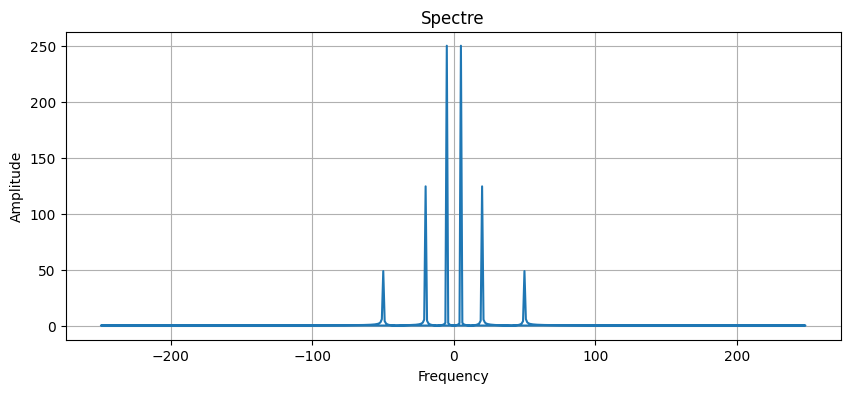

In [27]:
fft_signal = np.fft.fft(signal)

frequency  =np.fft.fftfreq(t.size, d=t[1]-t[0]) #time vector size, sampling

plt.figure(figsize=(10,4))
plt.plot(frequency, np.abs(fft_signal))
plt.title("Spectre")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# FFT by matrix decomposition

In [28]:
def create_fft_matrix(N):
    """Create the FFT matrix for a given size N."""
    n = np.arange(N)
    k = n.reshape((N, 1))
    omega = np.exp(-2j * np.pi * k * n / N)
    return omega

def fft_via_matrix_decomposition(signal):
    """Compute the FFT of a signal using matrix decomposition."""
    N = len(signal)
    fft_matrix = create_fft_matrix(N)
    return np.dot(fft_matrix, signal)

# Example signal
np.random.seed(0)  # For reproducibility
N = 8  # Size of the signal
signal = np.random.randn(N) + 1j * np.random.randn(N)

# FFT using matrix decomposition
fft_manual = fft_via_matrix_decomposition(signal)

# Gaussian noise ($\mathcal{n}$)

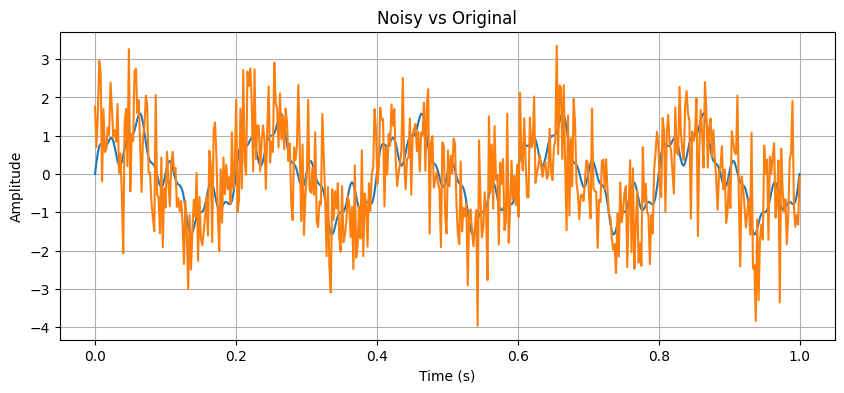

In [30]:
t = np.linspace(0,1,500)  #Start,end,samples

f1 = 5
f2 = 20
f3 = 50

A1 = 1
A2 = 0.5
A3 = 0.2

signal1 = A1*np.sin(2*np.pi*f1*t)
signal2 = A2*np.sin(2*np.pi*f2*t)
signal3 = A3*np.sin(2*np.pi*f3*t)

signal = signal1 + signal2 + signal3


np.random.seed(0)
noise = np.random.normal(0, 1, signal.shape) #mean,variance, end
noisy_signal = signal + noise

plt.figure(figsize=(10,4))
plt.plot(t, signal,label="Original Signal")
plt.plot(t, noisy_signal,label="Noisy Signal")
plt.title("Noisy vs Original")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Pasa bajas Filtro

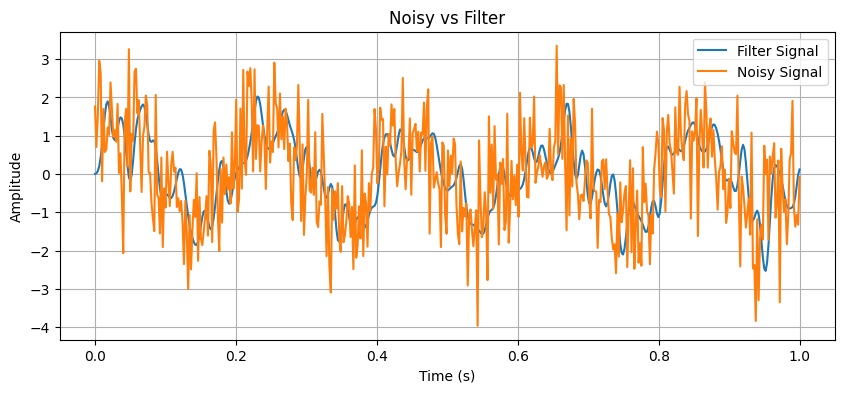

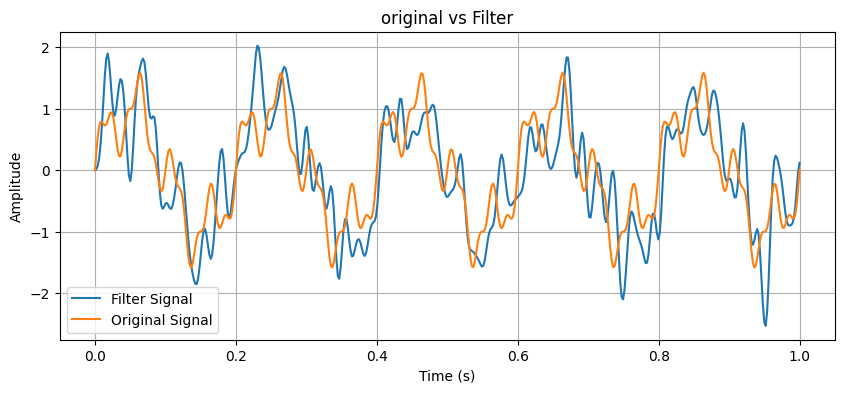

In [ ]:
from scipy.signal import butter, lfilter


#Filtro pasa bajas

def butter_lowpass_filter(data, cutoff, fs, order = 5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

cutoff = 10
filter_signal = butter_lowpass_filter(noisy_signal, cutoff, f3*2)

plt.figure(figsize=(10,4))
plt.plot(t, filter_signal,label="Filter Signal")
plt.plot(t, noisy_signal,label="Noisy Signal")
plt.legend()
plt.title("Noisy vs Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



plt.figure(figsize=(10,4))
plt.plot(t, filter_signal,label="Filter Signal")
plt.plot(t, signal,label="Original Signal")
plt.legend()
plt.title("original vs Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Correlation Function Pearson

In [ ]:
coeffcient_correlation_function = np.corrcoef(signal,filter_signal)[0,1]
coeffcient_correlation_function

0.7714770586589706

# Cross Correlation

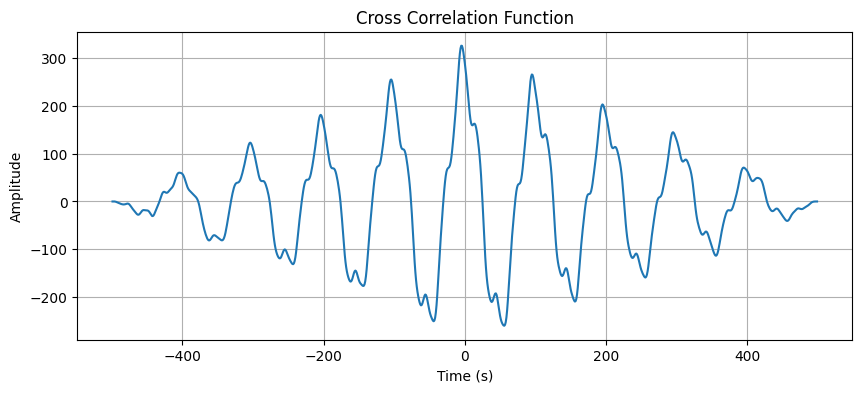

In [ ]:
correlation = np.correlate(signal, filter_signal, mode='full')

#Point on maximum correlation
lag_max = np.argmax(correlation) - (len(signal) - 1)

lags = np.arange(-(len(signal) - 1), len(signal))

plt.figure(figsize=(10,4))
plt.plot(lags, correlation)
plt.title("Cross Correlation Function")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()